In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [4]:
%matplotlib inline

In [5]:
# unzip data
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [6]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [7]:
open('names/yob2014.txt').readlines()[:10]

['Emma,F,20799\n',
 'Olivia,F,19674\n',
 'Sophia,F,18490\n',
 'Isabella,F,16950\n',
 'Ava,F,15586\n',
 'Mia,F,13442\n',
 'Emily,F,12562\n',
 'Abigail,F,11985\n',
 'Madison,F,10247\n',
 'Charlotte,F,10048\n']

### Loading data correctly

In [8]:
names2014 = pd.read_csv('names/yob2014.txt')
names2014.head()

,Emma,F,20799
0,Olivia,F,19674
1,Sophia,F,18490
2,Isabella,F,16950
3,Ava,F,15586
4,Mia,F,13442


In [9]:
# fix the issue of incorrect indices/headers
names2014 = pd.read_csv('names/yob2014.txt',names=['name','sex','count'])
names2014.head()

,name,sex,count
0,Emma,F,20799
1,Olivia,F,19674
2,Sophia,F,18490
3,Isabella,F,16950
4,Ava,F,15586


In [10]:
all_names = []
for year in range(1880,2014+1):
    all_names.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','count']))
    all_names[-1]['year'] = year

all_years = pd.concat(all_names)

In [11]:
all_years.head()

,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### Analyzing data
#### Name Popularity

In [12]:
all_years_indexed = all_years.set_index(['sex','name','year']).sort_index()
all_years_indexed.head(10)

count
sex name      year       
F   Aabha     2011      7
              2012      5
              2014      9
    Aabriella 2008      5
              2014      5
    Aaden     2009      5
    Aadhira   2012      6
              2013     10
              2014     13
    Aadhya    2007     10

In [13]:
all_years_indexed.loc['F','Julie'].head()

,count
year,
1880,22
1881,22
1882,22
1883,24
1884,31


In [14]:
def plot(sex,name):
    data = all_years_indexed.loc[sex,name]
    plt.plot(data.index,data.values)

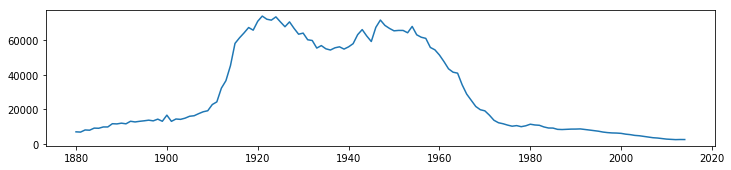

In [15]:
plt.figure(figsize=(12,2.5))
plot('F','Mary')

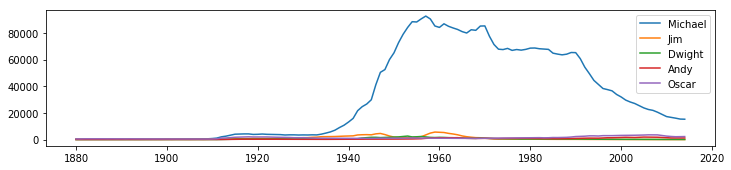

In [16]:
plt.figure(figsize=(12,2.5))
names = ['Michael','Jim','Dwight','Andy','Oscar']
for name in names:
    plot('M', name)
    
plt.legend(names)

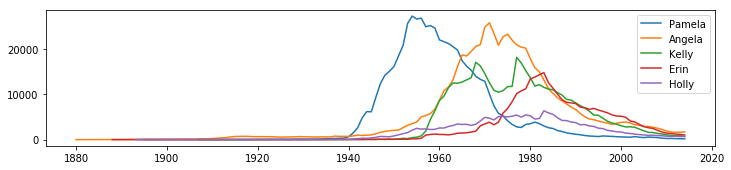

In [17]:
plt.figure(figsize=(12,2.5))
names = ['Pamela','Angela','Kelly','Erin','Holly']
for name in names:
    plot('F', name)
plt.legend(names)

In [21]:
all_years_indexed.loc['F'].loc[names].head()

count                        
name Angela Erin Holly Kelly Pamela
year                               
1880    7.0  NaN   NaN   NaN    NaN
1881    9.0  NaN   NaN   NaN    NaN
1882   24.0  NaN   NaN   NaN    NaN
1883   22.0  NaN   NaN   NaN    NaN
1884   20.0  NaN   NaN   NaN    NaN

In [28]:
all_years_indexed.loc['F'].loc[names].unstack(level=0).head()

count                        
name Angela Erin Holly Kelly Pamela
year                               
1880    7.0  NaN   NaN   NaN    NaN
1881    9.0  NaN   NaN   NaN    NaN
1882   24.0  NaN   NaN   NaN    NaN
1883   22.0  NaN   NaN   NaN    NaN
1884   20.0  NaN   NaN   NaN    NaN

In [29]:
variants = all_years_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()
variants

count                        
name Angela Erin Holly Kelly Pamela
year                               
1880    7.0  0.0   0.0   0.0    0.0
1881    9.0  0.0   0.0   0.0    0.0
1882   24.0  0.0   0.0   0.0    0.0
1883   22.0  0.0   0.0   0.0    0.0
1884   20.0  0.0   0.0   0.0    0.0

In [34]:
# Most popular names in a given year
# sort data frame by column
# drop columns
# join frames based on index
# count values in a series

In [36]:
all_years_indexed.loc['M',:,2008].head()

count
sex name    year       
M   Aadam   2008      6
    Aadan   2008     22
    Aadarsh 2008     13
    Aaden   2008    956
    Aadi    2008     76

In [46]:
# now sort column
all_years_indexed.loc['M',:,2008].sort_values('count',ascending=False).head(10)

count
sex name        year       
M   Jacob       2008  22568
    Michael     2008  20590
    Ethan       2008  20196
    Joshua      2008  19186
    Daniel      2008  18985
    Alexander   2008  18679
    William     2008  18380
    Anthony     2008  18378
    Christopher 2008  17928
    Matthew     2008  17573

In [77]:
def find_top_10(sex,year):
    pop = all_years_indexed.loc[sex,:,year].sort_values('count',ascending=False).reset_index()
    pop = pop.drop(['sex','year'],axis=1).head(10)
    pop.index +=1 # so that index begins from 1 not 0
    return pop

In [78]:
find_top_10('F',2010)

,name,count
1,Isabella,22883
2,Sophia,20612
3,Emma,17322
4,Olivia,17012
5,Ava,15418
6,Emily,14260
7,Abigail,14228
8,Madison,13166
9,Chloe,11741
10,Mia,10624


In [79]:
# top 10 names for a range of years
def top_10_range(sex,begin,end):
    top = [find_top_10(sex,year) for year in range(begin, end+1)]
    #print(top)
    return top[0].join(top[1:])
    